## Analysis
### How long usually a video can trend in different countries?
### How many likes, dislikes, views and comments get by different countries?
### Correlation of trending video in between countries
### Videos from which category has longer trend?
### Correlation between Days of Publish to Trend v/s Trending Duration
### Users like videos from which CATEGORY the most?
### What is the ratio of Likes-Dislikes and Views-Comments in different categories?
### What's the tags in the most negative and most positive category? What's the most discuss words for Science & Technology?

In [1]:
from IPython.display import HTML, display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

files = [i for i in glob.glob('./data/*.{}'.format('csv'))]
dfs = list()
for csv in files:
    df = pd.read_csv(csv)
    df['country'] = csv[7:9]
    dfs.append(df)

my_df = pd.concat(dfs)
#my_df = my_df.dropna()
to_int = ['views']
for column in to_int:
    my_df[column] = my_df[column].astype(int)
    my_df = my_df.drop_duplicates('video_id',keep='last').sort_values('views',ascending=False)
    most_views_thumb = my_df['thumbnail_link'].head(100).reset_index()['thumbnail_link']

ROW = 10
COLUMN = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(ROW):
    rowHTML = ''
    for c in range(COLUMN):
        if c != COLUMN-1:
            tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
            rowHTML += tempHTML
        else:
            tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
            rowHTML += tempHTML
    innerHTML += rowHTML #'<div>' +rowHTML + '</div>'
innerHTML += '</div>'
display(HTML(innerHTML))

#my_df.head()

In [2]:
csv

'./data\\USvideos.csv'

In [3]:
dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[7:9]
    dfs.append(df)

my_df = pd.concat(dfs)
my_df.head(3)


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# Any results you write to the current directory are saved as output.

In [5]:
my_df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,CA
_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,CA
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,CA
JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,CA


### Reformat the date time and removed the incompleted rows

In [6]:
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'],errors='coerce', format='%y.%d.%m')
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publish_time'].notnull()]

# my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
iDXlWTRyxgE,2017-11-07,04:58:21
mCx26FLXWuI,2017-11-07,04:52:25
sLJdBmAeB_U,2017-11-07,19:00:50
fiusxyygqGk,2017-11-10,15:00:03
-N5eucPMTTc,2017-11-10,19:19:43


In [7]:
my_df

,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
iDXlWTRyxgE,2017-11-14,"Gun Violence Makes Us Feel Powerless, But We'r...",The Late Show with Stephen Colbert,24,2017-11-07,04:58:21,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1189325,21859,7016,11869,https://i.ytimg.com/vi/iDXlWTRyxgE/default.jpg,False,False,False,Stephen expresses his feelings on the most use...,GB
mCx26FLXWuI,2017-11-14,Seth Rollins & Dean Ambrose vs. Cesaro & Sheam...,WWE,17,2017-11-07,04:52:25,"wwe|""world wrestling entertainment""|""wrestling...",1689382,24186,3330,3414,https://i.ytimg.com/vi/mCx26FLXWuI/default.jpg,False,False,False,In a main event with enormous Survivor Series ...,GB
sLJdBmAeB_U,2017-11-14,COME SHOPPING WITH ME AND TRY ON NEW CLOTHING ...,Inthefrow,26,2017-11-07,19:00:50,"Inthefrow|""In the frow""|""COME SHOPPING WITH ME...",87772,2617,86,192,https://i.ytimg.com/vi/sLJdBmAeB_U/default.jpg,False,False,False,COME SHOPPING WITH ME AND TRYING ON NEW CLOTHI...,GB
fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,2017-11-10,15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10,19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11,17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,GB
rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB
uT3wso5Zp7k,2017-11-14,Sexy Darth Vader | Lex Croucher,Lex Croucher,23,2017-11-04,10:00:03,"tyrannosauruslexxx|""lexcanroar""|""lex croucher""...",20387,1322,68,68,https://i.ytimg.com/vi/uT3wso5Zp7k/default.jpg,False,False,False,The hottest daddy of all. \n\n\nTwitter: http:...,GB
kqbJCW-jxYM,2017-11-14,"Lil Kim Keeps It Real On Nicki Minaj, Biggie R...",HOT 97,10,2017-11-03,13:48:20,"hot97|""hot97app""|""music""|""video""|""hip hop""|""ra...",407075,5819,598,2815,https://i.ytimg.com/vi/kqbJCW-jxYM/default.jpg,False,False,False,HOT 97 App: http://www.hot97.com/hot97app\n\nY...,GB


We keep two set of data here:

1. my_df (which only keep the last entry if duplicated because it carries latest stat)
2. my_df_full ( full set of combined data, keep for later use)

### Insert category column

In [8]:
my_df['category_id'] = my_df['category_id'].astype(str)
my_df_full['category_id'] = my_df['category_id'].astype(str)

category_id = {}

with open('./data/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

my_df.insert(4, 'category', my_df['category_id'].map(category_id))
my_df_full.insert(4, 'category', my_df_full['category_id'].map(category_id))
category_list = my_df['category'].unique()
category_list

array(['Entertainment', 'Sports', 'Howto & Style', 'Music',
       'People & Blogs', 'News & Politics', 'Comedy', 'Film & Animation',
       'Science & Technology', 'Gaming', 'Autos & Vehicles', 'Education',
       'Shows', 'Pets & Animals', 'Travel & Events',
       'Nonprofits & Activism', 'Trailers', 'Movies'], dtype=object)

### Analysis : How long usually a video can trend in different countries?
The statistic provided has a key features to reflect how long a video trending which is the number of appearances. The greater the number of apperances indicate the long-last the video trend is. From here we can see that United Kingdom's list has the most long trended Youtube videos (Top 5 in the list is from GB).

In [9]:
# 비디오 아이디와 나라별로 타이틀의 갯수를 세서 즉,같은 비디오가 나온 횟수를 담음.
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()

(      video_id country  title
 0  BhIEIO0vaBE      GB     38
 1  u_C4onVrr8U      GB     38
 2  Il-an3K9pjg      GB     38
 3  2z3EUY1aXdY      GB     38
 4  NooW_RbfdWI      GB     38,           video_id country  title
 94253  _tRFEndU_zQ      FR      1
 94254  _tGtSqb8LE0      DE      1
 94255  _tG7i5Tj0oI      CA      1
 94256  _tEABSuLjNc      FR      1
 94257  --2K8l6BWfw      FR      1)

### Let's visualize the stats above using line graphs

In [10]:
my_df.groupby(['country']).count()

,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
country,,,,,,,,,,,,,,,,,
CA,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,19168,18354
DE,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,24880,23734
FR,26934,26934,26934,26934,26934,26934,26934,26934,26934,26934,26934,26934,26934,26934,26934,26934,24573
GB,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3105,3051
US,5321,5321,5321,5321,5321,5321,5321,5321,5321,5321,5321,5321,5321,5321,5321,5321,5233


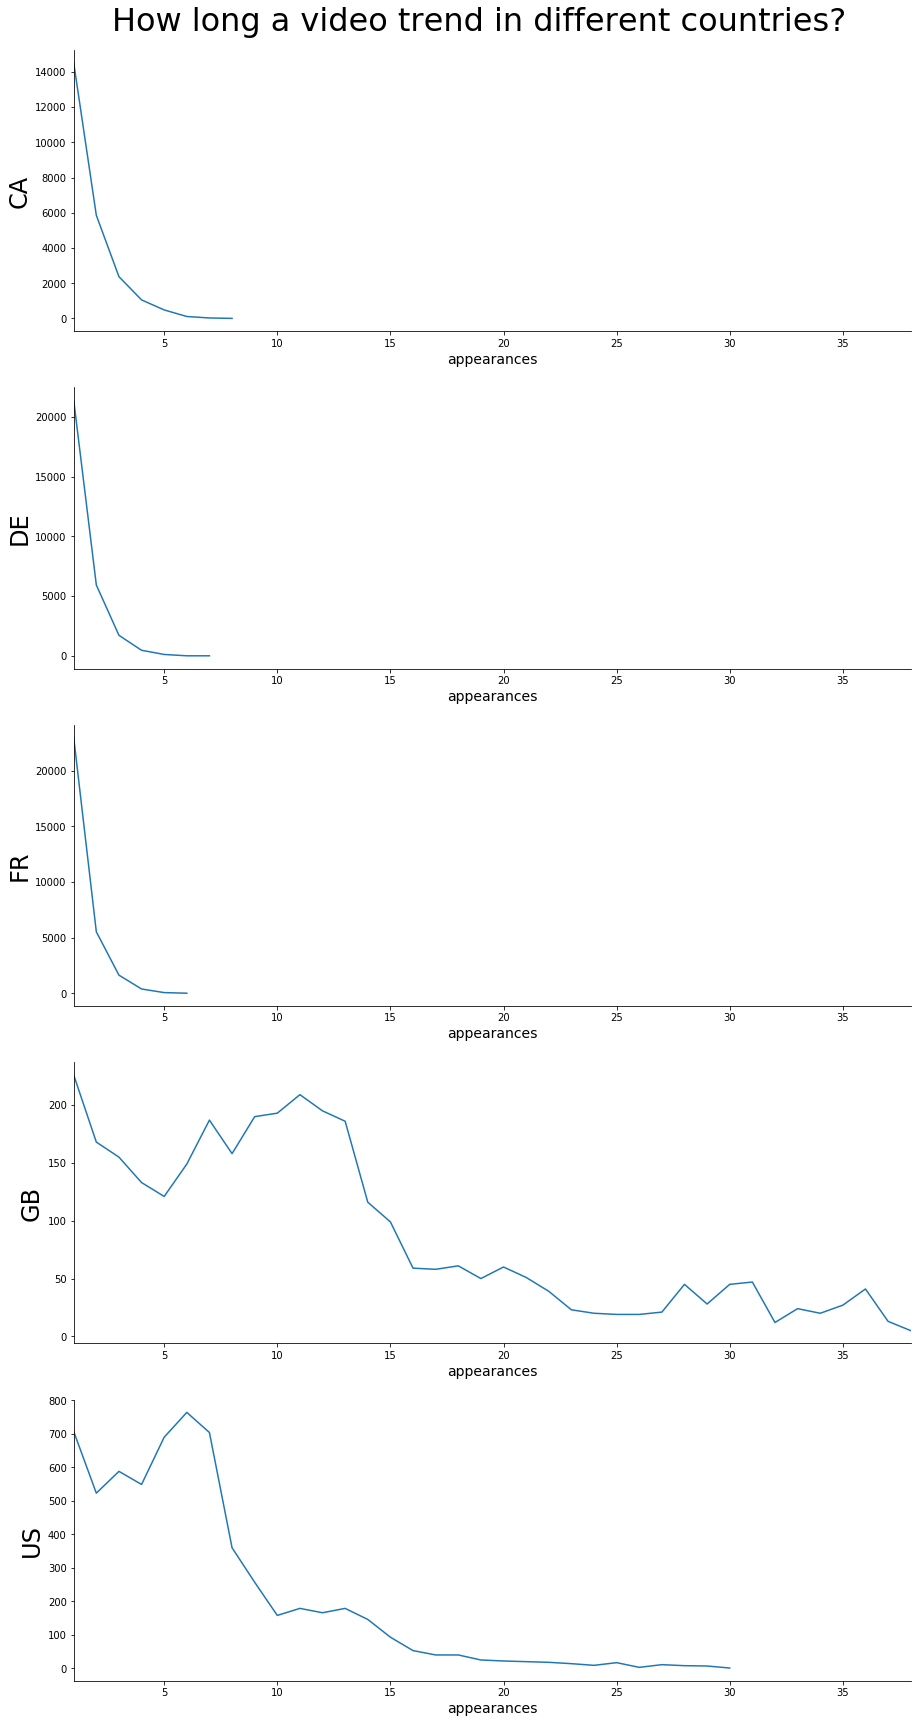

In [11]:
video_list,max_list = list(),list()
country_list = my_df.groupby(['country']).count().index

for c in country_list:
    video_list.append(fre_df[fre_df['country']==c]['title'].value_counts().sort_index()) # 어떤 title이 몇번 나왔는지 국가별로 리스트 만듬
    max_list.append(max(fre_df[fre_df['country']==c]['title'].value_counts().sort_index().index))

fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(nrows=5,figsize=(15, 30))
st = fig.suptitle("How long a video trend in different countries?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14) # 트렌드 비디오 뽑힌 횟수
    pt.set_ylabel(country_list[i],fontsize=24) # 뽑힌 횟수별 비디오 개수
    pt.axes.set_xlim(1, max(max_list))

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)

Observation :
From the line graphs above we can see that United Kingdom has numbers of enduring video in trend follow by US and Canada. In contrast, both France and Germany have very few video can last long in trending with max of 5 appearances in statistics.

### Ratio of Youtube Trending Videos in 5 countries
Since we have combined statistics from multiple countries, it's good to have a look on the number and ratio of videos we have in different countries. In this plot we keep only last entry for duplicated videos. That's why we can clearly observe that the country with the most long-trending video end up having lesser videos.

country
CA    19168
DE    24880
FR    26934
GB     3105
US     5321
Name: title, dtype: int64

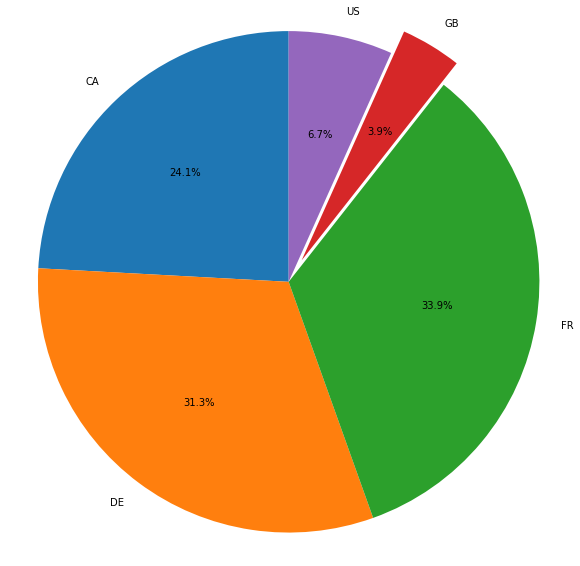

In [12]:
labels = my_df.groupby(['country']).count().index
sizes = my_df.groupby(['country']).count()['title']
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, explode=explode, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
sizes

### Analysis : How many likes, dislikes, views and comments get by different countries?

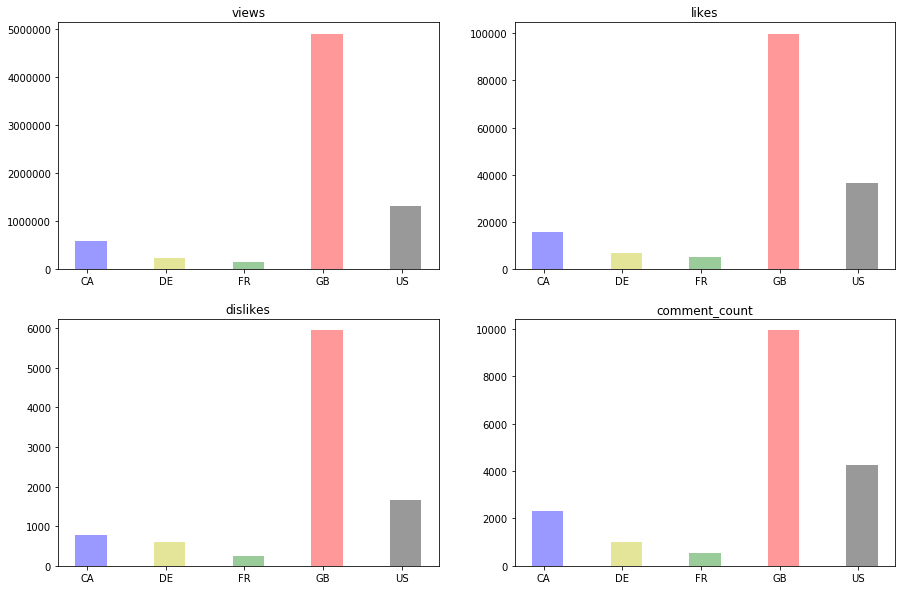

In [13]:
to_int = ['views', 'likes', 'dislikes', 'comment_count']
for column in to_int:
    my_df[column] = my_df[column].astype(int)
    
measures = list()
n_groups = len(country_list)
for i, typ in enumerate(to_int):
    measure = list()
    for c in country_list:
        measure.append(my_df[my_df['country']==c][typ].agg('sum')/len(my_df[my_df['country']==c].index.unique()))
    measures.append(measure)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
error_config = {'ecolor': '0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
                alpha=opacity, color=['b','y','g','r','k'],
                error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)

Observation: Obviously, four of the graphs share the similar trend in numbers. One possible reason to this is due to the video's trending duration. Enduring trending videos have the advantages in getting more views, likes, dislikes and comments.

### Analysis : Correlation of trending video in between countries

Question : Does the video trending in one country will trend in other countries too? If yes,how much do they correlate to each other?

Let's find out the answer!

In [14]:
corr_list = pd.DataFrame(fre_df['video_id'].unique(), columns=['video_id'])
corr_list

,video_id
0,BhIEIO0vaBE
1,u_C4onVrr8U
2,Il-an3K9pjg
3,2z3EUY1aXdY
4,NooW_RbfdWI
5,5GHXEGz3PJg
6,8h--kFui1JA
7,dzxFdtWmjto
8,Q17z9a03YaM
9,dARAN1z2KqY


### Analysis : Users like videos from which CATEGORY the most?¶

Text(0.5, 1.0, 'Catogories of trend videos in United Kingdom')

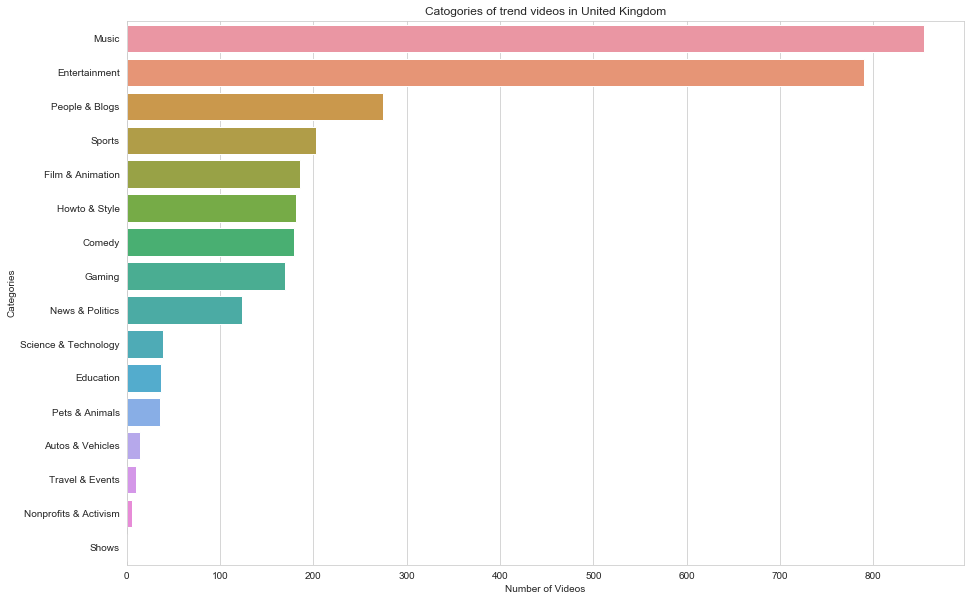

In [16]:
cat_df_gb = my_df[my_df['country']=='GB']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb,orient='h')
plt.xlabel("Number of Videos")## From United Kingdom users : 
plt.ylabel("Categories")
plt.title("Catogories of trend videos in United Kingdom")

Text(0.5, 1.0, 'Catogories of trend videos in US')

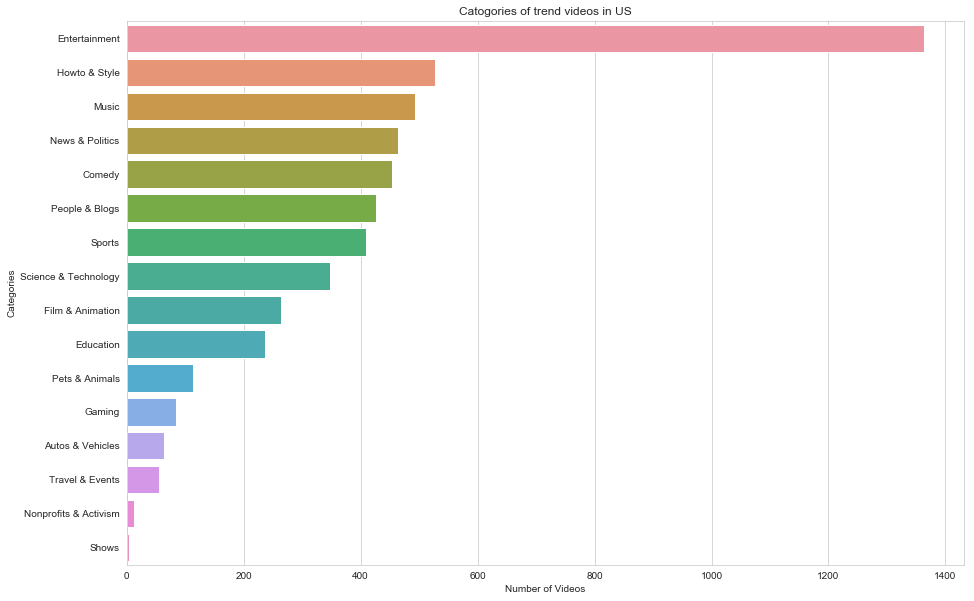

In [17]:
cat_df_us = my_df[my_df['country']=='US']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['category'], data=cat_df_us,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in US")

Text(0.5, 1.0, 'Catogories of trend videos in CANADA')

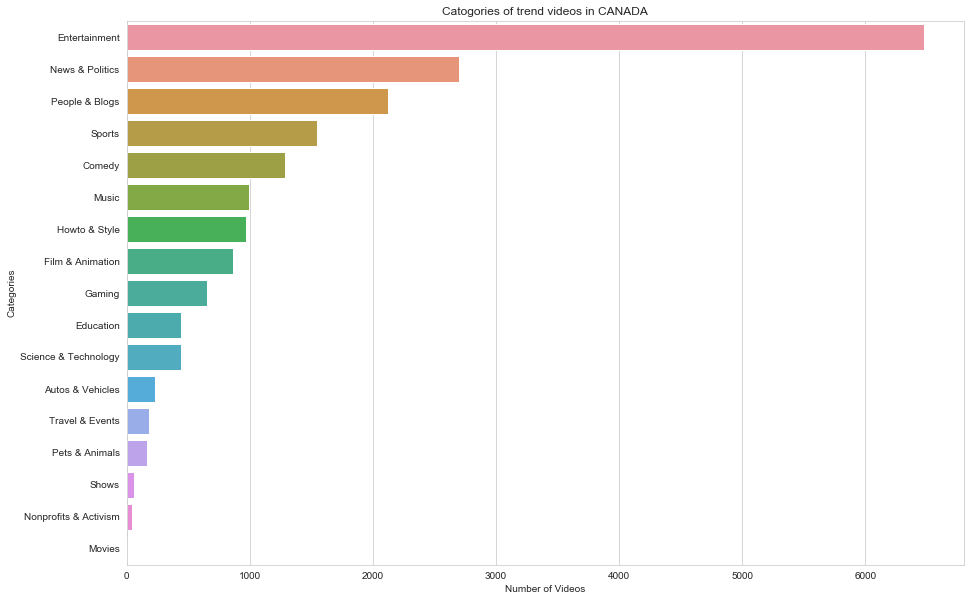

In [18]:
cat_df_ca = my_df[my_df['country']=='CA']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['category'], data=cat_df_ca,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in CANADA")

Text(0.5, 1.0, 'Catogories of trend videos in GERMANY')

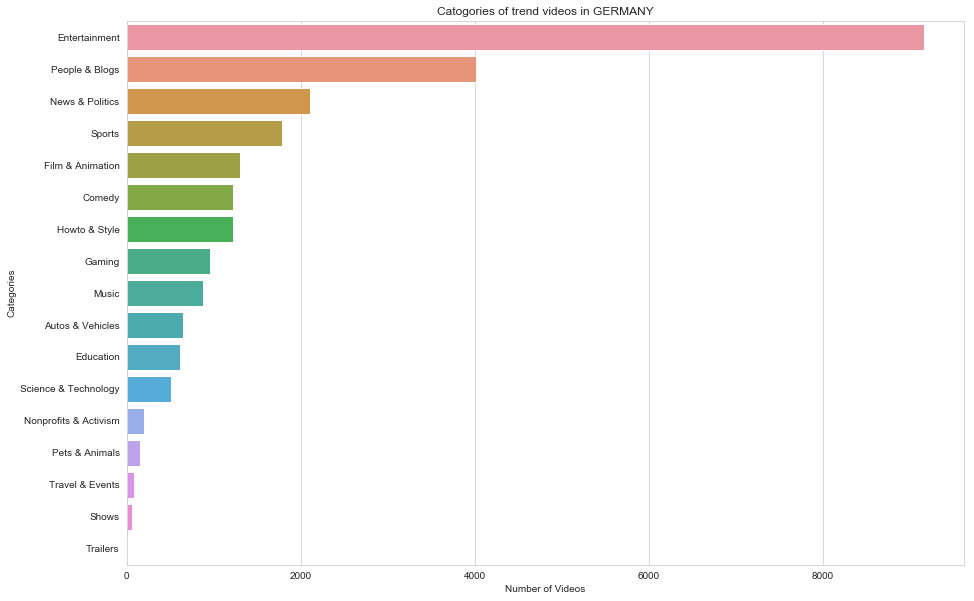

In [19]:
cat_df_de = my_df[my_df['country']=='DE']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_de['index'],x=cat_df_de['category'], data=cat_df_de,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in GERMANY")

Text(0.5, 1.0, 'Catogories of trend videos in FRANCE')

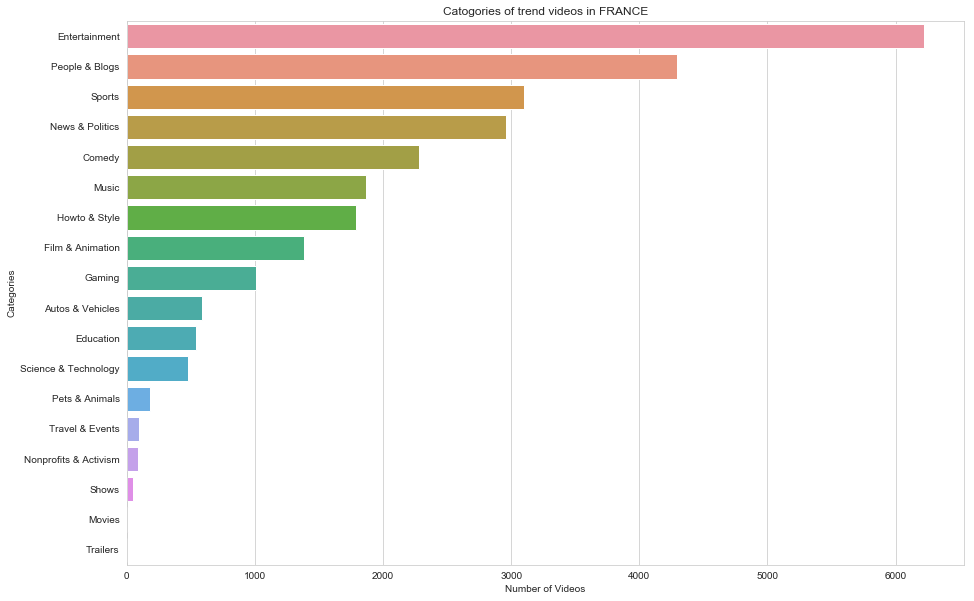

In [20]:
cat_df_fr = my_df[my_df['country']=='FR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in FRANCE")

Observation:
Top category of all 5 countries is Entertainment.
Music's videos ranked insignificantly in Canada, Germany and France compare to US and UK.
Sport's videos are more popular in Canada, Germany and France.
All top 8 categories in United Kingdom entertainment-related, this might not be a good sign.
Show's and Activism's video get the bottom rank in all most countries.
Remarks: Please feel free to comment in below if you observe any interesting facts.

### Analysis : Videos from which category has longer trend?

Getting the days on trend for videos

In [21]:
publish_to_trend = {}
my_df_first = my_df_full.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
diff_first = (my_df_first['trending_date']).astype('datetime64[ns]')-my_df_first['publish_date'].astype('datetime64[ns]')

diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']

for i, row in diff_first.iterrows():
    publish_to_trend[row['video_id']] = row['publish_to_trend'].days

my_df_last = my_df
diff_last = my_df['trending_date'].astype('datetime64[ns]')-my_df['publish_date'].astype('datetime64[ns]')
diff_last = diff_last.reset_index()
diff_last.columns = ['video_id','publish_to_trend_last']
my_df = my_df.reset_index()
my_df.insert(4,'publish_to_trend_last', diff_last['publish_to_trend_last'].astype('timedelta64[D]').astype(int))
my_df.insert(4, 'publish_to_trend', my_df['video_id'].map(publish_to_trend))
my_df.insert(4, 'trend_duration', 0)
my_df['trend_duration'] = (my_df['publish_to_trend_last']-my_df['publish_to_trend'])+1
my_df.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()

,publish_to_trend,trend_duration
video_id,,
kZete48ZtsY,1,49
NooW_RbfdWI,1,38
BhIEIO0vaBE,1,38
2z3EUY1aXdY,0,38
2nUW3nIOOOg,0,37


In [22]:
my_df.groupby(['category','trend_duration']).count()['video_id']

category          trend_duration
Autos & Vehicles  1                 1149
                  2                  282
                  3                   49
                  4                   14
                  5                    8
                  6                    3
                  7                    9
                  8                    8
                  9                    3
                  11                   7
                  12                   2
                  13                   3
                  14                   1
                  15                   2
                  17                   1
                  21                   1
Comedy            1                 2671
                  2                 1295
                  3                  702
                  4                  256
                  5                   95
                  6                   76
                  7                   68
                  8     

Text(0.5, 1.0, 'Category v/s Trending Duration')

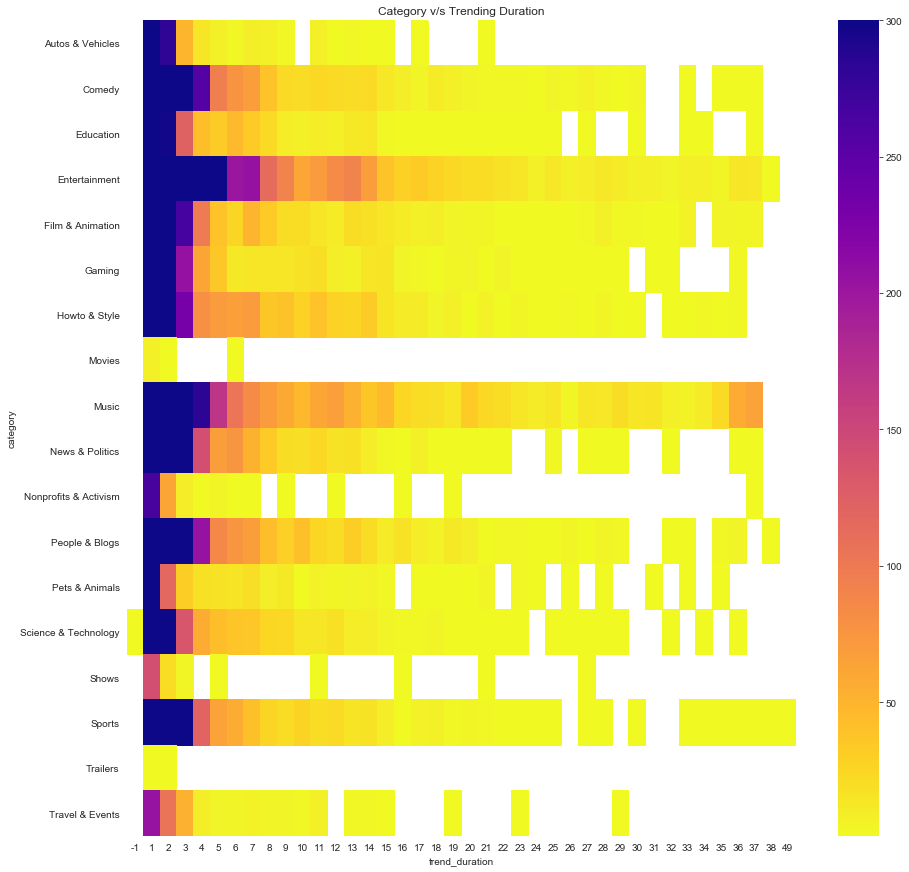

In [23]:
cat_trend_duration= my_df.groupby(['category','trend_duration']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))#You can Arrange The Size As Per Requirement
sns.heatmap(cat_trend_duration, cmap='plasma_r')
plt.title("Category v/s Trending Duration")

 we get the ranking of long trend categories:

Music

Entertainment

People & Blogs

Sports

Comedy

New & Politics 

Howto & Style

<Figure size 2160x1440 with 0 Axes>

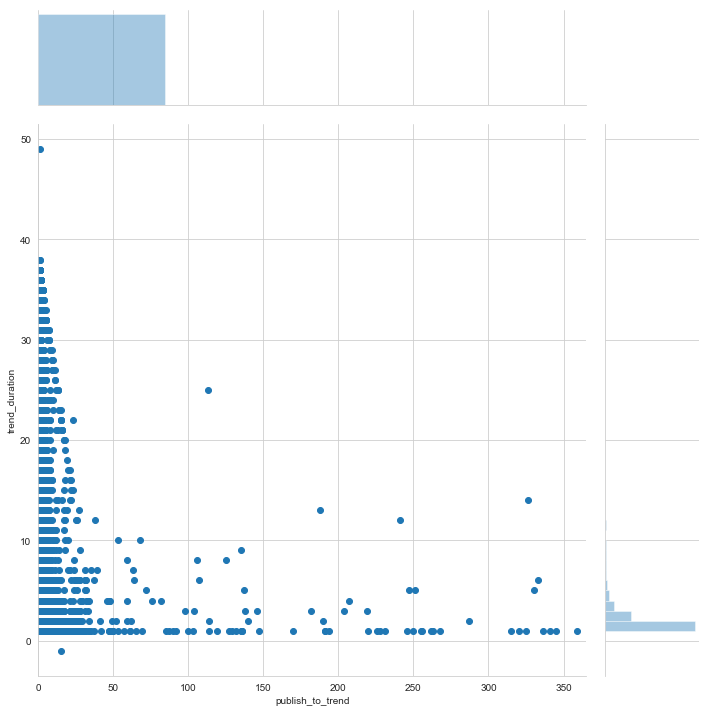

In [24]:
# Days of Publish to Trend , Trending Duration 관계
'trend_duration','publish_to_trend'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 20))
sns.jointplot(y = my_df.trend_duration, x = my_df.publish_to_trend, data = my_df, kind = 'scatter', height = 10, xlim=(0,365))
plt.show()

Text(0.5, 1.0, 'Correlation between Days from Publish v/s Trend and Trending Duration')

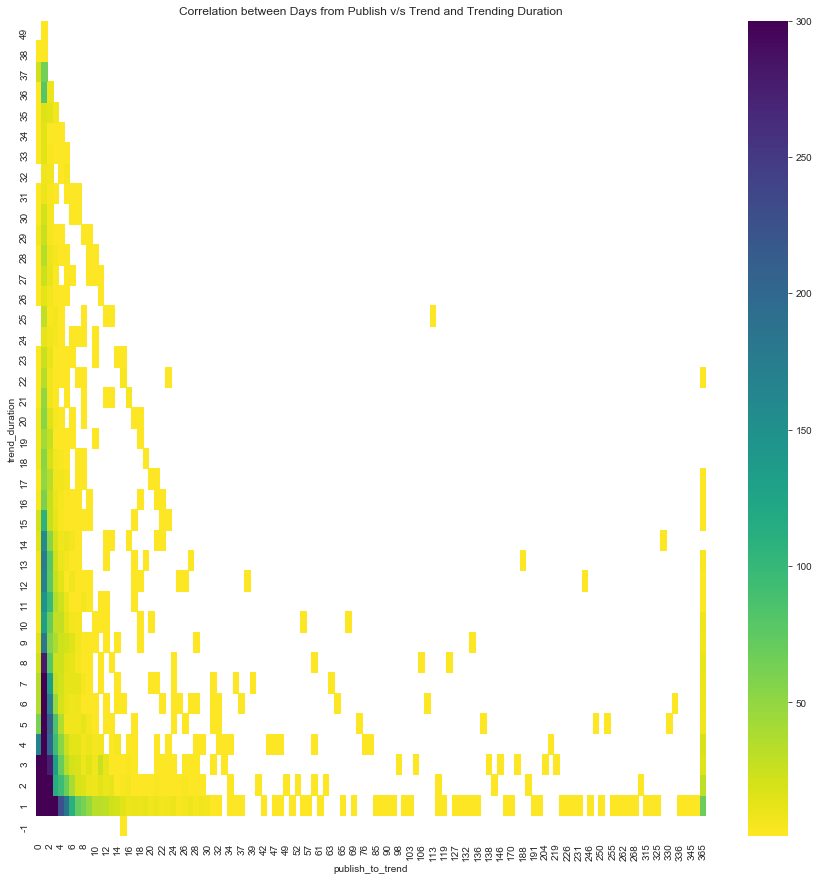

In [25]:
my_df['publish_to_trend'] = my_df['publish_to_trend'].clip(upper=365)
cat_trend_duration= my_df.groupby(['trend_duration','publish_to_trend']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cat_trend_duration, cmap='viridis_r')
ax.invert_yaxis()
plt.title("Correlation between Days from Publish v/s Trend and Trending Duration")

The less days needed for a video from publish to trend, the longer the trend duration.
Videos that can get into trending within 5 days will have higher probability to be trending for longer time.

### Analysis : What is the ratio of Likes-Dislikes and Views-Comments in different categories?
Likes-Dislikes Ratio

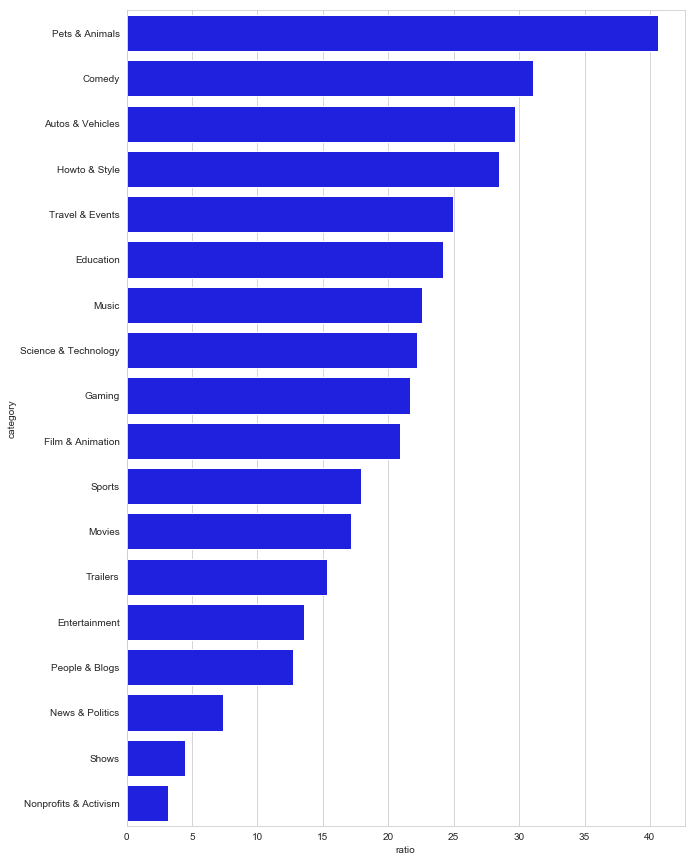

In [26]:
like_dislike_ratio = my_df.groupby('category')['likes'].agg('sum') / my_df.groupby('category')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")

Views-Comments Ratio

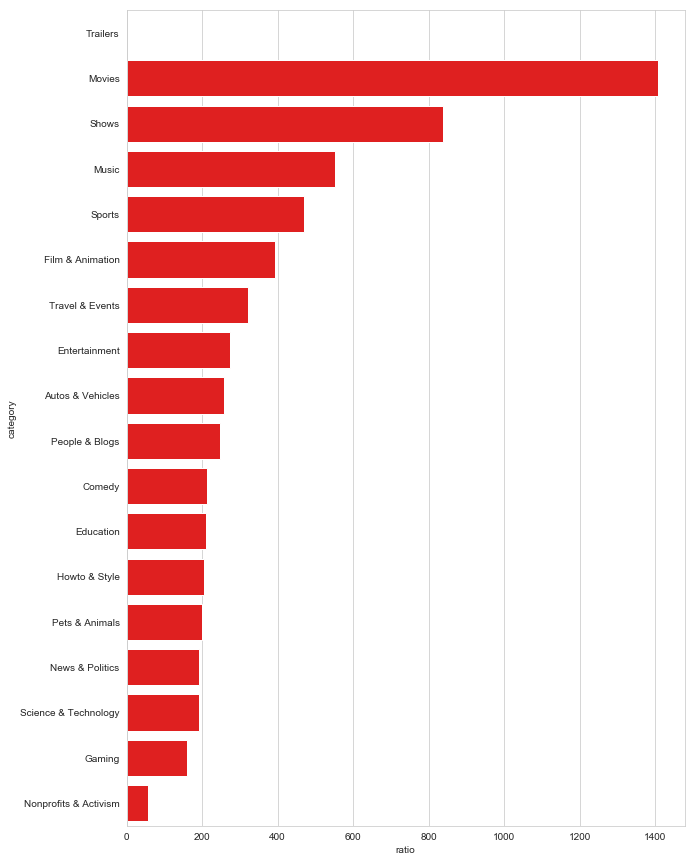

In [27]:
views_comment_ratio = my_df.groupby('category')['views'].agg('sum') / my_df.groupby('category')['comment_count'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=views_comment_ratio,
            label="Views-Comments Ratio", color="r")

애완동물 & 동물 비디오는 호감도가 가장 높다. 놀랄 일도 아니다, 사람들은 애완동물과 동물을 싫어하기 어렵다는 것을 알게 된다.
명백하게, 사람들은 여전히 명시적인 것보다 암묵적인 피드백을 선호한다. 댓글에 대한 조회수 비율이 너무 커서 수백건 뷰당 하나정도 댓글이 달린다.

### Analysis: Sentiment analysis on Video's tags

In [28]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

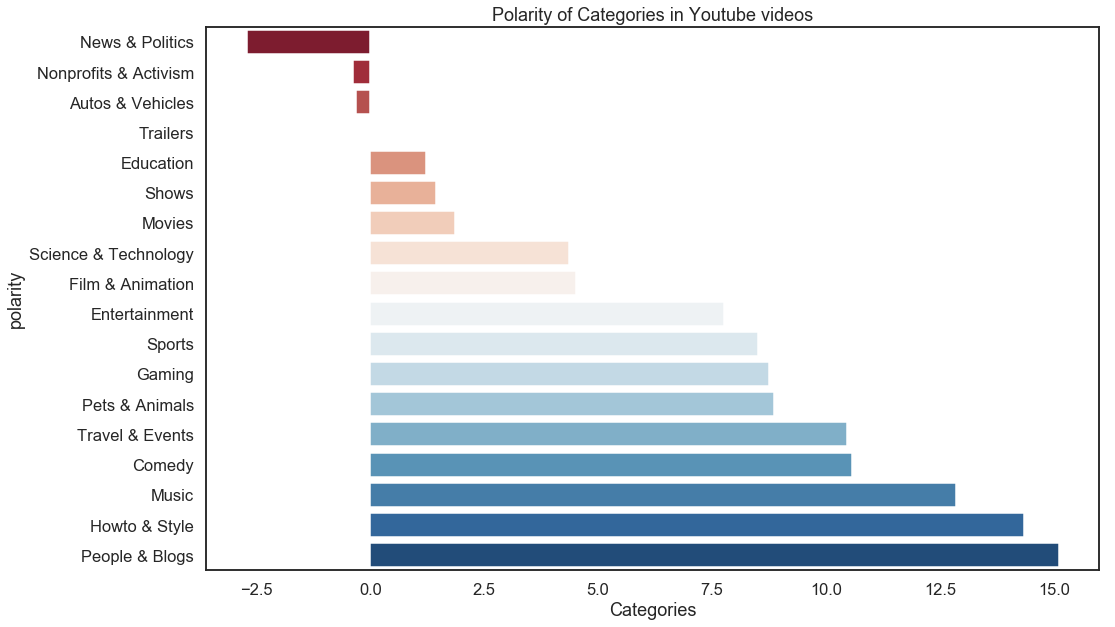

In [29]:
MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities = list()

for cate in category_list:
    tags_word = my_df[my_df['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")

By using sentiment analyzer from NLTK, we can examine the polarities of tags from all Youtube Trending Videos. All the 1000 most frequent tag from each categories were examined and result in form of number. NEGATIVE values indicate that most of the tags have negative sentiment and POSITIVE in contrast.

As expected, people can feel negative emotions in news and politics. Anger at the political establishment that fails to provide a solution to the real problem is a global trend.

### Analysis : What's the tags in the most negative and most positive category? What's the most discuss words for Science & Technology?

In [30]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

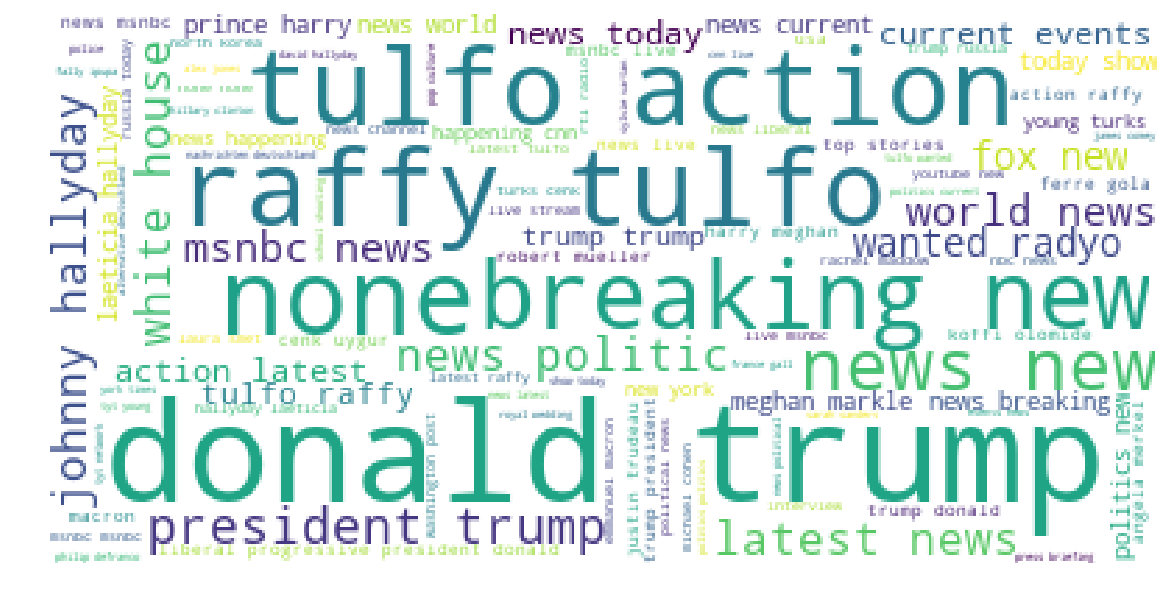

In [31]:
tags_word = my_df[my_df['category']=='News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

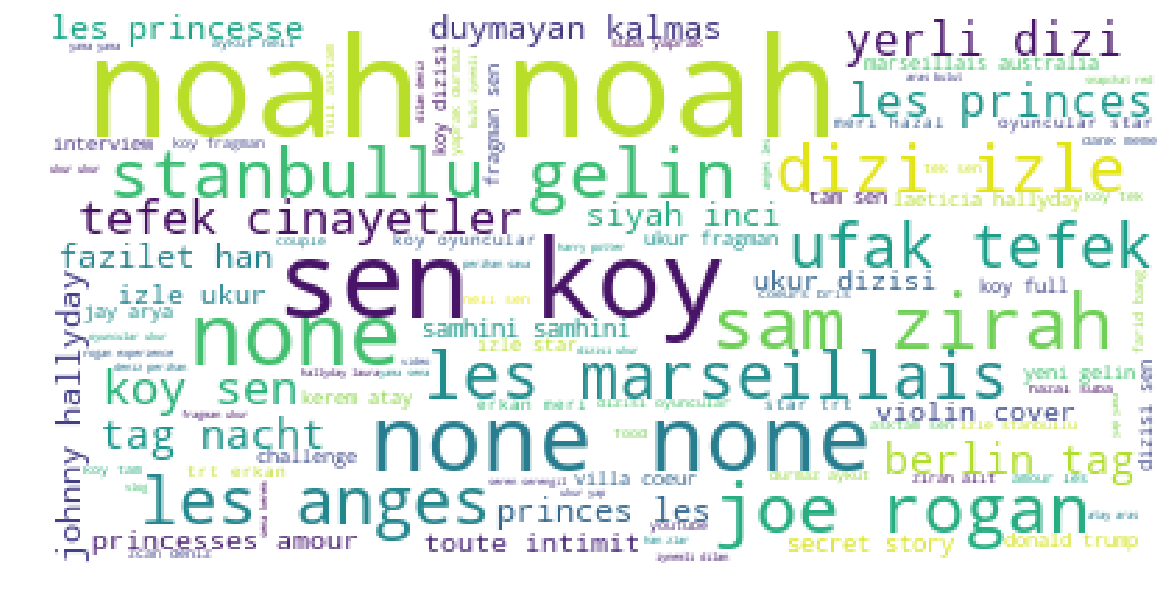

In [32]:
tags_word = my_df[my_df['category']=='People & Blogs']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

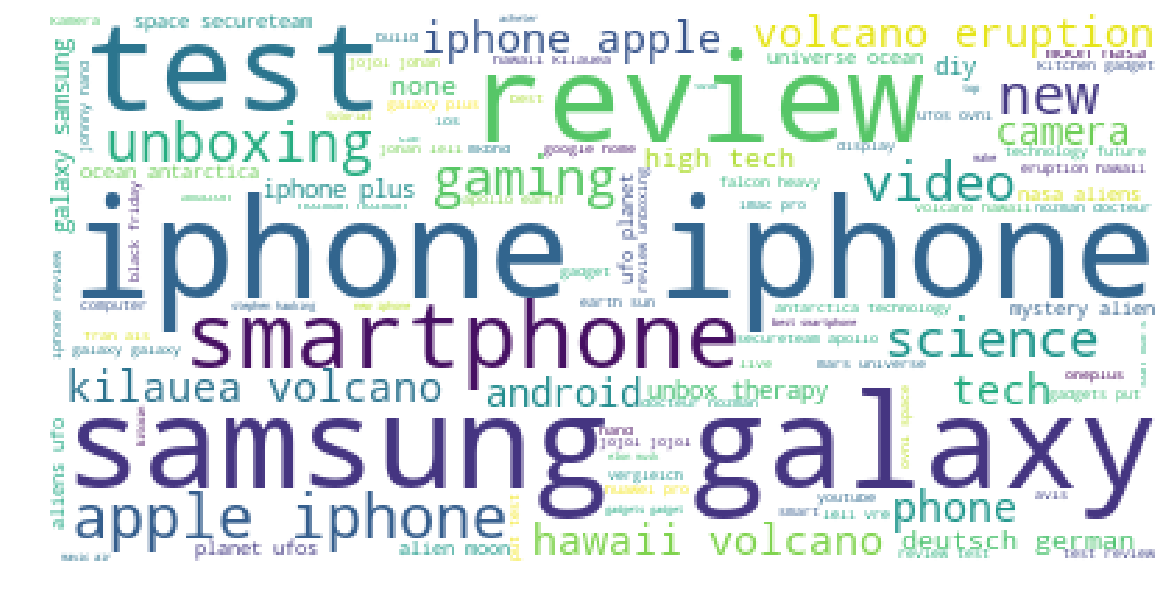

In [33]:
tags_word = my_df[my_df['category']=='Science & Technology']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')